In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

data_2016 = "president_general_polls_2016.csv"

# Note, didn't change plot titles/axis labels.

In [2]:
df = pd.read_csv(data_2016)
df.head()

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,...,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,...,43.34557,41.21439,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/2/2016,11/6/2016,Ipsos,A-,...,42.02638,38.81620,6.844734,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:35:33 8 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/4/2016,11/7/2016,YouGov,B,...,45.65676,40.92004,6.069454,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:35:33 8 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,...,46.84089,42.33184,3.726098,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:35:33 8 Nov 2016


C:\Users\e.istre91\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


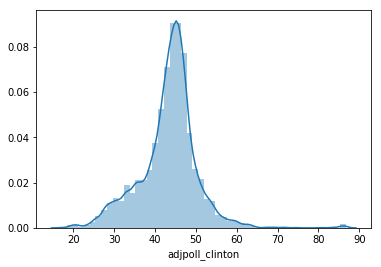

In [3]:
sns.distplot(df["adjpoll_clinton"])
plt.show()

This plot provides a good overview of the range of values, but it's not great for determining detailed information. In this case, it also doesn't provide any sense of time over which the polls took place.

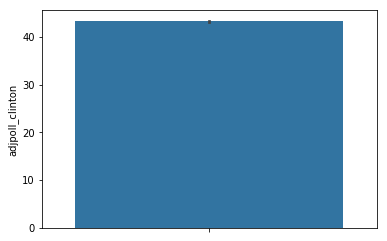

In [4]:
sns.barplot(y=df["adjpoll_clinton"])
plt.show()

This shows a single mean and is really not a great plot in this case as there is nothing to compare it against.

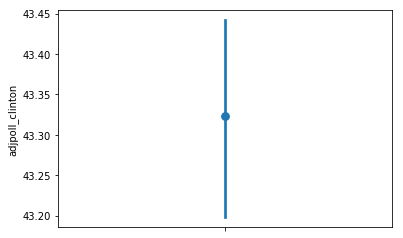

In [5]:
sns.pointplot(y=df["adjpoll_clinton"])
plt.show()

Basically the same as the barplot in this case, doesn't show much by itself. Also the long error bar gives the impression that there is more variation than there is.

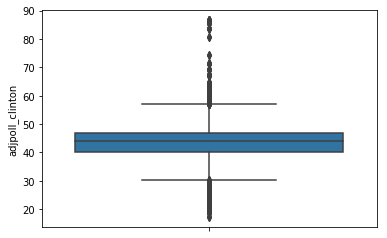

In [6]:
sns.boxplot(y=df["adjpoll_clinton"])
plt.show()

This gives a good sense of the amount of variation in the polling data, while also showing that there are significant outliers in the data. It also shows that the middle 50% is a pretty narrow range. 

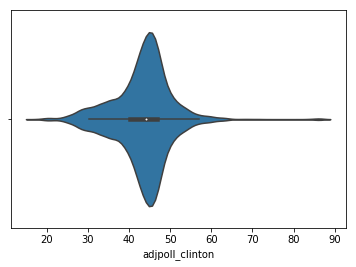

In [7]:
sns.violinplot(x=df["adjpoll_clinton"])
plt.show()

This gives a great display about where the data sits and giving a clear impression of how little data there is for the outliers.

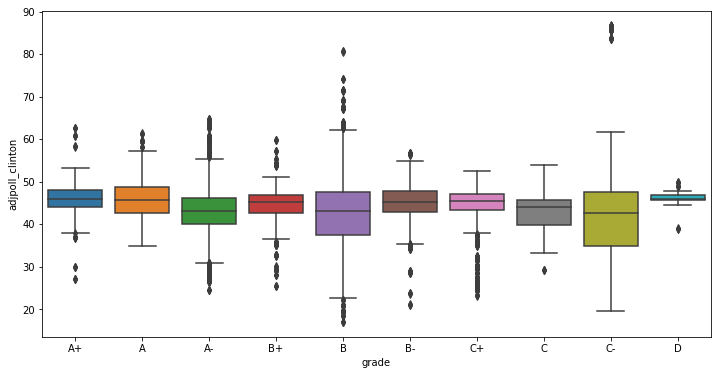

In [8]:
order = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D"]

plt.figure(figsize=(12,6))
sns.boxplot(x="grade", y="adjpoll_clinton", order=order, data=df)
plt.show()

This shows a few interesting things. Note that the C+ and lower grade polls only tend to have outliers in the bottom of the range. The con about this one is there is a lot to visually process.

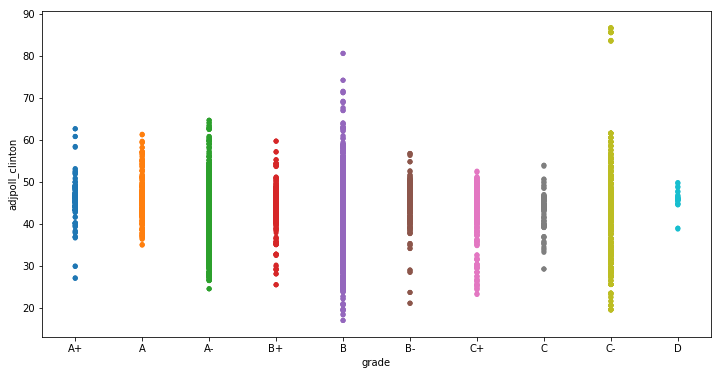

In [9]:
plt.figure(figsize=(12,6))
sns.stripplot(x="grade", y="adjpoll_clinton", order=order, data=df)
plt.show()

This gives a good quick overview of the data, but doesn't provide a clear sense of hwo much data is present in each grade.

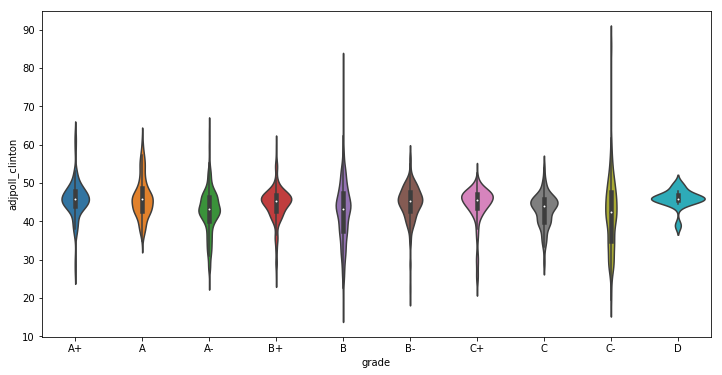

In [10]:
plt.figure(figsize=(12,6))
sns.violinplot(x="grade", y="adjpoll_clinton", order=order, data=df)
plt.show()

This is really the best of both previous graphs, showing range but also the density of points.

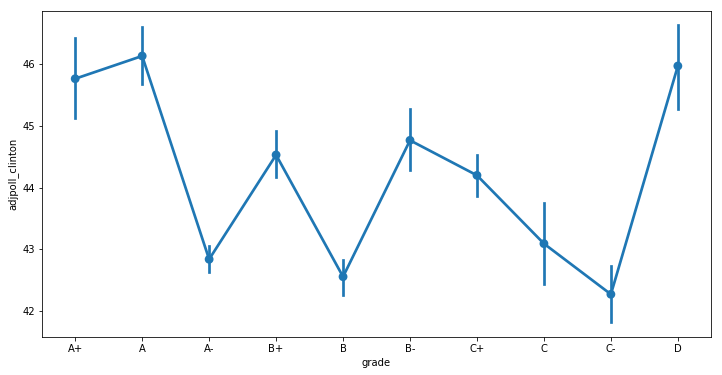

In [11]:
plt.figure(figsize=(12,6))
sns.pointplot(x="grade", y="adjpoll_clinton", order=order, data=df)
plt.show()

This gives a quick idea of where the mean of the polls fell in each grade. Note that the y axis is smaller than the others so far, which cuts down on the impression of variance.

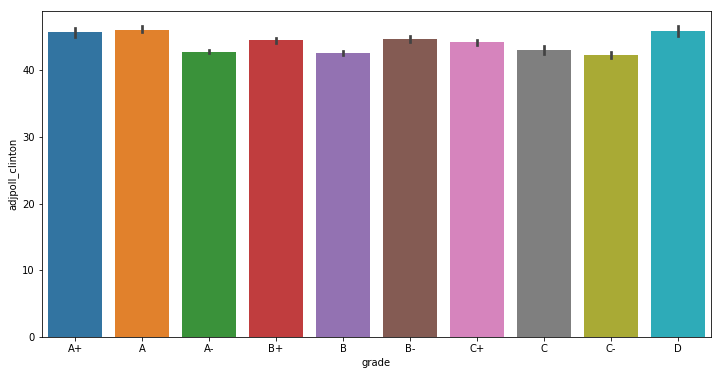

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x="grade", y="adjpoll_clinton", order=order, data=df)
plt.show()

This works pretty well to show that the grades didn't appear to differ in any meaningful way.

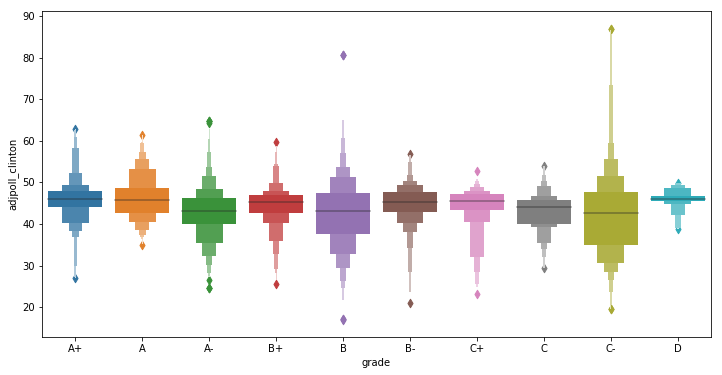

In [13]:
plt.figure(figsize=(12,6))
sns.lvplot(x="grade", y="adjpoll_clinton", order=order, data=df)
plt.show()

This gives a decent sense of where the data is in each grade, and is comparable to the violin plot.

C:\Users\e.istre91\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


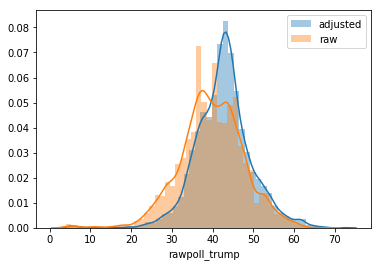

In [14]:
sns.distplot(df["adjpoll_trump"], label="adjusted")
sns.distplot(df["rawpoll_trump"], label="raw")
plt.legend()
plt.show()

This gives a nice display in the difference between the adjusted poll values from 538 and the raw poll values. Not the increase towards normality in the adjusted values.

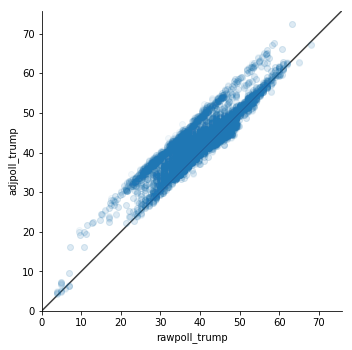

In [15]:
# https://stackoverflow.com/questions/25497402/adding-y-x-to-a-matplotlib-scatter-plot-if-i-havent-kept-track-of-all-the-data
lm = sns.lmplot(x="rawpoll_trump", y="adjpoll_trump", data=df, scatter_kws={'alpha':0.05}, fit_reg=False)
ax = lm.axes[0][0]
lims = [np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()])]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

This shows that generally the adjusted poll values were greater than the rawpoll values. It is a bit of a cluttered graph though.

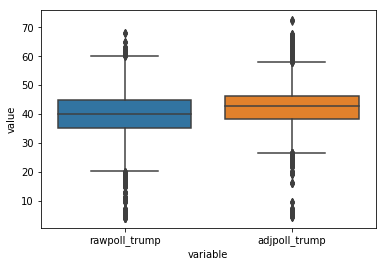

In [16]:
melt_raw_adj = pd.melt(df, id_vars=['poll_id'], value_vars=['rawpoll_trump', 'adjpoll_trump'])
sns.boxplot(x='variable', y='value', data=melt_raw_adj)
plt.show();

This provides a good comparison in the differences between the raw polls and the adjusted polls.